# Source/Target Specific Global Regressors

In [1]:
from py2neo import Node, Relationship, Graph
from numpy.random import rand
import numpy as num
from bokeh.plotting import output_notebook,figure, show
from bokeh.layouts import row,column,gridplot
from bokeh.models import Label
import numpy as np
from curve import *
from bokeh.models import Span,Legend
output_notebook()

Loading BokehJS ...

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pickle as pk
A = pk.load(open('local.pk','rb'))


import random

def gen_hex_colour_code():
   return '#'+''.join([random.choice('0123456789ABCDEF') for x in range(6)])

C = {}

In [4]:
R = roi_regressors()

/Users/kshadi/Desktop/MANIA2/sample/curve.py:292: RuntimeWarning: invalid value encountered in double_scalars
  ce = num.sum([xx[1] for xx in A[i]['envelope']])/len(A[i]['envelope'])
/Users/kshadi/Desktop/MANIA2/sample/curve.py:293: RuntimeWarning: invalid value encountered in double_scalars
  cex = num.sum([xx[0] for xx in A[i]['envelope']])/len(A[i]['envelope'])


In [5]:
R['s-L1']

(79.87791157449719, -0.076300359106025839, 0.002042721390276002)

In [6]:
D = all_regressors(R,A)

/Users/kshadi/Desktop/MANIA2/sample/curve.py:332: RuntimeWarning: invalid value encountered in double_scalars
  fx = (sl[0]*r[0]+(100-r[0])*tmp)/100


In [7]:
D[('L1','L180')]

(-0.087085881533079265, 0.0026326475889031525, 3)

In [8]:
def func(ind):
    ind = int(ind)
    noise_floor = -6
    cur = A[ind]
    a = cur['a']
    b = cur['b']
    env = cur['envelope']
    x = [xx[0] for xx in env]
    y = [xx[1] for xx in env]
    z = cur['z']
    n1 = cur['n1']
    n2 = cur['n2']
    model = D[(n1,n2)]
    N = len(a)
    c = [0]*N
    for i in range(N):
        if b[i] < noise_floor:
            c[i] = b[i]
            continue
        c[i] = b[i]-a[i]*model[0]
    z_corrected = [xx for xx in y]
    for q,w in enumerate(y):
        z_corrected[q] = w-x[q]*model[0]
    label = n1+"=>"+n2
    p1 = figure(title="Original Data",toolbar_location="below",
                background_fill_color="#E8DDCB")
    p1.circle(a,b,legend=label)
    p1.square(x,y,color='green',legend='Envelope')
    p1.line(x,z,color='green',legend='Regressor')
    p2 = figure(title="corrected Data",toolbar_location="below",
                background_fill_color="#E8DDCB")
    p2.circle(a,c)
    p2.square(x,z_corrected,color='green',legend='Envelope')
    grid = gridplot([[p1, p2]])
    show (grid)
    return True

In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(func, ind='1');

interactive(children=(Text(value='1', description='ind'), Output()), _dom_classes=('widget-interact',))

In [10]:
print(set([A[i]['reason'] for i in range(len(A))]))

{'r2', 'envelope', None}


In [8]:
def func2(ind):
    ind = int(ind)
    noise_floor = -6
    cur = A[ind]
    a = cur['a']
    b = cur['b']
    env = cur['envelope']
    x = [xx[0] for xx in env]
    y = [xx[1] for xx in env]
    z = cur['z']
    n1 = cur['n1']
    n2 = cur['n2']
    v1, v2, cat = D[(n1,n2)]
    model = (v1,v2)
    N = len(a)
    c = [0]*N
    tmp = (n1,n2)
    try:
        adj[tmp]
        flag = 1
    except:
        flag = 0
    for i in range(N):
        if b[i] < noise_floor:
            c[i] = b[i]
            continue
        c[i] = b[i]-a[i]*(model[0]+2*model[1])
    return (c,cat,flag, max(b))
Z = []
co = 0
en = 0
noo = 0
plott0 = []
plott1 = []
plott2 = []
plott3 = []
_plott0 = []
_plott1 = []
_plott2 = []
_plott3 = []
DD = {}
for i in range(len(A)):
    c, cat, fl, bmax = func2(i)
    c = max(c)
    c = int(min(5000,5000*num.exp(c)))*100.0/5000.0
    bmax = int(min(5000,5000*num.exp(bmax)))*100.0/5000.0
    n1 = A[i]['n1']
    n2 = A[i]['n2']
    DD[n1+n2] = (bmax,c)
    if cat == 0:
        plott0.append(c)
        _plott0.append(bmax)
    if cat == 1:
        plott1.append(c)
        _plott1.append(bmax)
    if cat == 2:
        plott2.append(c)
        _plott2.append(bmax)
    if cat == 3:
        plott3.append(c)
        _plott3.append(bmax)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
rem = 180*179 - len(A)
plott3 = plott3 + [0]*rem + [100]
_plott3 = _plott3 + [0]*rem + [100]

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

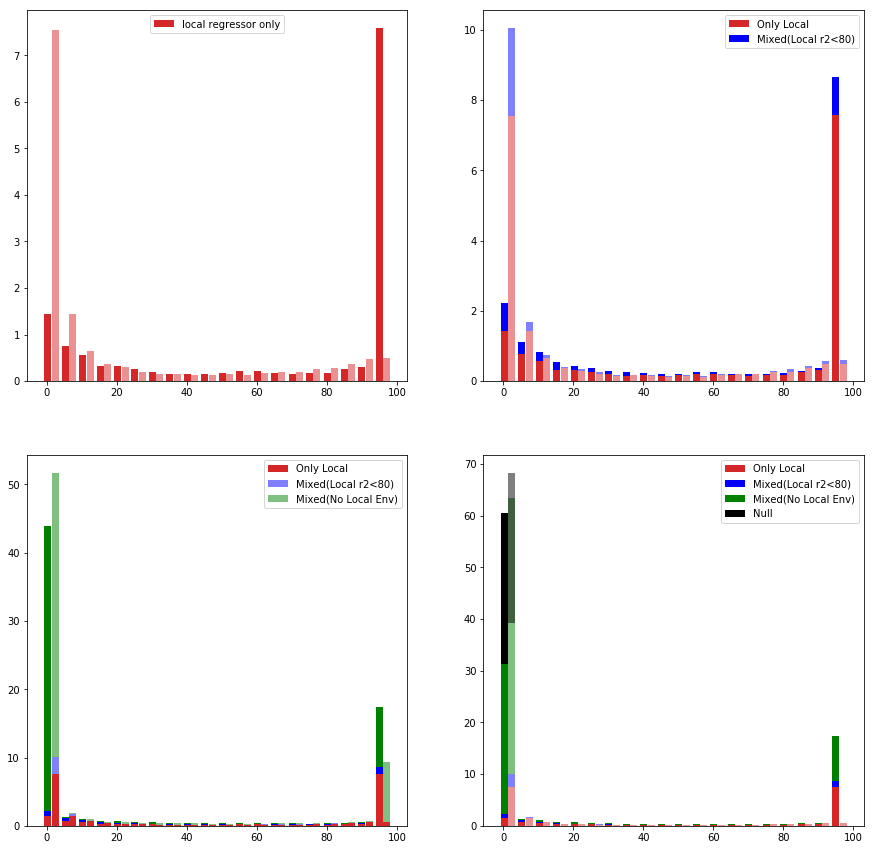

In [11]:
tot = 180*179
width = 2
plt.subplots(2,2,figsize=(15,15))
plt.subplot(221)

measured = plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
p1 = plt.bar(edges[0:-1], hist0, width, color='#d62728', label='local regressor only')
measured = _plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
p1 = plt.bar(edges[0:-1]+2, hist0, width, color='#d62728',alpha=.5)
plt.legend()

# ------------

plt.subplot(222)
measured = plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
p1 = plt.bar(edges[0:-1], hist0, width, color='#d62728', label='local regressor only')
measured = plott1
hist1, _edges = np.histogram(measured, bins=20)
hist1 = 100.0*hist1/tot
p2 = plt.bar(edges[0:-1], hist1, width,color='blue', bottom=hist0)
plt.legend((p1[0], p2[0]), ('Only Local', 'Mixed(Local r2<80)'))

measured = _plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
p1 = plt.bar(edges[0:-1]+2, hist0, width, color='#d62728',alpha=.5)
measured = _plott1
hist1, _edges = np.histogram(measured, bins=20)
hist1 = 100.0*hist1/tot
p2 = plt.bar(edges[0:-1]+2, hist1, width,color='blue', alpha=.5, bottom=hist0)

#-------------
plt.subplot(223)
measured = plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
measured = plott1
hist1, _edges = np.histogram(measured, bins=20)
hist1 = 100.0*hist1/tot
measured = plott2
hist2, _edges = np.histogram(measured, bins=20)
hist2 = 100.0*hist2/tot
measured = plott3
hist3, _edges = np.histogram(measured, bins=20)
hist3 = 100.0*hist3/tot
p1 = plt.bar(edges[0:-1], hist0, width, color='#d62728')
p2 = plt.bar(edges[0:-1], hist1, width,bottom=hist0, color = 'blue')
p3 = plt.bar(edges[0:-1], hist2, width,bottom=hist0+hist1, color = 'green')

measured = _plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
measured = _plott1
hist1, _edges = np.histogram(measured, bins=20)
hist1 = 100.0*hist1/tot
measured = plott2
hist2, _edges = np.histogram(measured, bins=20)
hist2 = 100.0*hist2/tot
measured = _plott3
hist3, _edges = np.histogram(measured, bins=20)
hist3 = 100.0*hist3/tot
p1 = plt.bar(edges[0:-1]+2, hist0, width, color='#d62728')
p2 = plt.bar(edges[0:-1]+2, hist1, width,color='blue', alpha=.5, bottom=hist0)
p3 = plt.bar(edges[0:-1]+2, hist2, width,color='green', alpha=.5, bottom=hist0+hist1)

plt.legend((p1[0], p2[0],p3[0]), ('Only Local', 'Mixed(Local r2<80)', 'Mixed(No Local Env)'))

#-------------------------
plt.subplot(224)
measured = plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
measured = plott1
hist1, _edges = np.histogram(measured, bins=20)
hist1 = 100.0*hist1/tot
measured = plott2
hist2, _edges = np.histogram(measured, bins=20)
hist2 = 100.0*hist2/tot
measured = plott3
hist3, _edges = np.histogram(measured, bins=20)
hist3 = 100.0*hist3/tot
p1 = plt.bar(edges[0:-1], hist0, width, color='#d62728')
p2 = plt.bar(edges[0:-1], hist1, width,color = 'blue', bottom=hist0)
p3 = plt.bar(edges[0:-1], hist2, width,color = 'green',bottom=hist0+hist1)
p4 = plt.bar(edges[0:-1], hist3, width,color='black', bottom=hist0+hist1+hist3)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ('Only Local', 'Mixed(Local r2<80)', 'Mixed(No Local Env)','Null'))

measured = _plott0
hist0, edges = np.histogram(measured, bins=20)
hist0 = 100.0*hist0/tot
measured = _plott1
hist1, _edges = np.histogram(measured, bins=20)
hist1 = 100.0*hist1/tot
measured = _plott2
hist2, _edges = np.histogram(measured, bins=20)
hist2 = 100.0*hist2/tot
measured = _plott3
hist3, _edges = np.histogram(measured, bins=20)
hist3 = 100.0*hist3/tot
p1 = plt.bar(edges[0:-1]+2, hist0, width,color='#d62728',alpha=.5)
p2 = plt.bar(edges[0:-1]+2, hist1, width,color = 'blue',alpha=.5, bottom=hist0)
p3 = plt.bar(edges[0:-1]+2, hist2, width,color = 'green',alpha=.5,bottom=hist0+hist1)
p4 = plt.bar(edges[0:-1]+2, hist3, width,color='black',alpha=.5, bottom=hist0+hist1+hist3)
plt.show()

In [12]:
ZC = list(filter(lambda x: x >= 0.0000001,Z))
ZN = list(filter(lambda x: x <= -5,Z))

In [13]:
print('larger than 0:')
print(len(ZC)*100.0/len(Z))
print('Smaller than -5:')
print(len(ZN)*100.0/len(Z))
print('larger than 0 and failure local model for r2:')
print(co*100.0/len(Z))
print('larger than 0 and failure local model for env:')
print(en*100.0/len(Z))
print('larger than 0 and adjacent:')
print(noo*100.0/len(Z))

larger than 0:


ZeroDivisionError: float division by zero

In [70]:
p1 = figure(title="Intercept",toolbar_location="below",
            background_fill_color="#E8DDCB")

measured = Z
hist, edges = np.histogram(measured, density=True, bins=100)
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="#fffaaa", line_color="#033649",alpha = .5)

p2 = figure(title="Intercept",toolbar_location="below",
            background_fill_color="#E8DDCB")
cdf = np.cumsum(hist)
cdf = 100.0*cdf/max(cdf)
p2.line(edges[1:],cdf)
grid = gridplot([[p1, p2]])
show (grid)

In [55]:
D[('L1','L2')]

(-0.098156710939393946, 0.0027074442853091728)

In [122]:
adj = {}
with open('adj.csv') as f:
    w = f.readlines()
    for v in w:
        n1,n2 = v.split(',')
        n1 = n1.strip('\n "')
        n2 = n2.strip('\n "')
        adj[(n1,n2)] = 1
        adj[(n2,n1)] = 1

In [121]:
len(adj)

1023

In [23]:
def func(ind):
    ind = int(ind)
    noise_floor = -6
    cur = A[ind]
    a = cur['a']
    b = cur['b']
    env = cur['envelope']
    x = [xx[0] for xx in env]
    y = [xx[1] for xx in env]
    z = cur['z']
    n1 = cur['n1']
    n2 = cur['n2']
    model = D[(n1,n2)]
    N = len(a)
    c = [0]*N
    for i in range(N):
        if b[i] < noise_floor:
            c[i] = b[i]
            continue
        c[i] = b[i]-a[i]*model[0]
    return (n1,n2,max(b),max(c))
    
S = {}
for i in range(180):
    for j in range(180):
        S[('L'+str(i+1),'L'+str(j+1))] = (0,0)
l = len(A)
for i in range(l):
    n1,n2,b,c = func(i)
    b = int(min(5000,5000*num.exp(b)))
    c = int(min(5000,5000*num.exp(c)))
    S[(n1,n2)] = (b,c)

In [27]:
CR = num.zeros((180,180))
CC = num.zeros((180,180))
for i in range(180):
    for j in range(180):
        n1 = 'L'+str(i+1)
        n2 = 'L'+str(j+1)
        tmp = S[(n1,n2)]
        CR[i,j] = tmp[0]
        CC[i,j] = tmp[1]

In [32]:
from utils import *

In [53]:
clip = 10
nar = [0]*(5000-2*clip)
den = [0]*(5000-2*clip)
T = [0]*(5000-2*clip)
for i in range(clip,5000-clip):
    net = num.zeros((180,180))
    the = num.log(i/5000.0)
    net[CC>the] = 1
    q = i - clip
    nar[q] = NAR(net)
    den[q] = density(net)
    T[q] = the

In [57]:
p1 = figure(title="Density - NAR",toolbar_location="below",
            background_fill_color="#E8DDCB")
p1.line(den,nar,color = 'red',legend = 'Not Corrected')
p1.line(denc,narc,color = 'green',legend = 'Corrected')
p1.xaxis.axis_label = 'Density'
p1.yaxis.axis_label = 'NAR'

p2 = figure(title="Threshold - NAR",toolbar_location="below",
            background_fill_color="#E8DDCB")
p2.line(T,nar,color = 'red',legend = 'Not Corrected')
p2.line(T,narc,color = 'green',legend = 'Corrected')
p2.xaxis.axis_label = 'Threshold'
p2.yaxis.axis_label = 'NAR'

p3 = figure(title="Threshold - Density",toolbar_location="below",
            background_fill_color="#E8DDCB")
p3.line(T,den,color = 'red',legend = 'Not Corrected')
p3.line(T,denc,color = 'green',legend = 'Corrected')
p3.xaxis.axis_label = 'Threshold'
p3.yaxis.axis_label = 'Density'

grid = gridplot([[p1, p2],[p3,None]])
show (grid)

In [14]:
for i in range(1,181):
    for j in range(1,181):
        n1 = 'L'+str(i)
        n2 = 'L'+str(j)
        try:
            DD[n1+n2]
        except:
            DD[n1+n2] = (0,0)

In [19]:
ZZ = {}
_ZZ = {}
for i in range(1,180):
    for j in range(i+1,181):
        n1 = 'L'+str(i)
        n2 = 'L'+str(j)
        if DD[n1+n2][1] < DD[n2+n1][1]:
            n1 = 'L'+str(j)
            n2 = 'L'+str(i)
#         ZZ[n1+n2] = DD[n1+n2][1]
        ZZ[n1+n2] = (DD[n1+n2][0],DD[n1+n2][1],DD[n1+n2][0]-DD[n2+n1][0],DD[n1+n2][1]-DD[n2+n1][1])
        n1 = 'L'+str(i)
        n2 = 'L'+str(j)
        if DD[n1+n2][0] < DD[n2+n1][0]:
            n1 = 'L'+str(j)
            n2 = 'L'+str(i)
#         ZZ[n1+n2] = DD[n1+n2][1]
        _ZZ[n1+n2] = (DD[n1+n2][0],DD[n1+n2][1],DD[n1+n2][0]-DD[n2+n1][0],DD[n1+n2][1]-DD[n2+n1][1])

In [20]:
C = sorted(ZZ.values(),reverse=True,key = lambda x:x[1])

In [28]:
C = sorted(ZZ.values(),reverse=True,key = lambda x:x[1])
x = [xx[1] for xx in C]
y = [xx[-1] for xx in C]
p3 = figure(title="Absolute Assymetry (corrected data)",
            background_fill_color="#E8DDCB")
p3.circle(x,y)
p3.xaxis.axis_label = 'Probability of connection (maximum direction)'
p3.yaxis.axis_label = 'Absolute asymmetry'

# p4 = figure(title="Intercept  somewhat connected",
#             background_fill_color="#E8DDCB")
# p4.circle(x,y)
# grid = gridplot([[p3,p4],[None,None]])
show(p3)

In [29]:
C = sorted(_ZZ.values(),reverse=True,key = lambda x:x[0])
x = [xx[0] for xx in C]
y = [xx[-2] for xx in C]
p3 = figure(title="Absolute asymmetry not corrected",
            background_fill_color="#E8DDCB")
p3.circle(x,y)
p3.xaxis.axis_label = 'Probability of connection (maximum direction)'
p3.yaxis.axis_label = 'Absolute asymmetry'
# p4 = figure(title="Intercept  somewhat connected",
#             background_fill_color="#E8DDCB")
# p4.circle(x,y)
# grid = gridplot([[p3,p4],[None,None]])
show(p3)